--- 0.1441950798034668 seconds ---
{'0101010101': 1024}


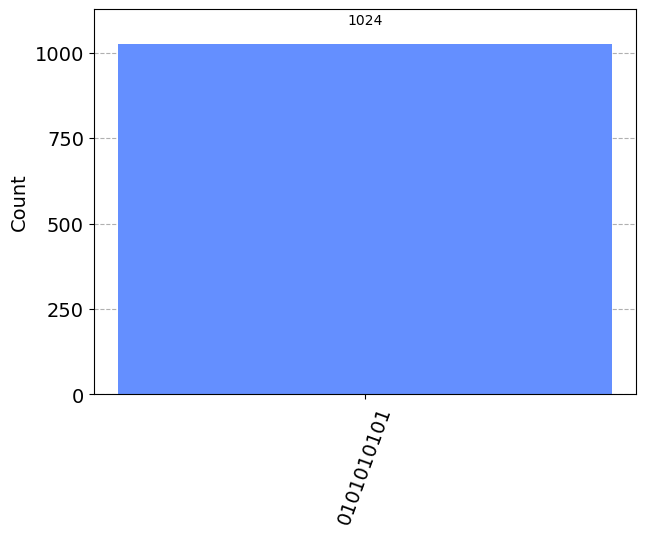

In [10]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit.visualization import plot_histogram
import math
import time

def hadamard_transform(circ, my_wires):
    for wire in my_wires:
        circ.h(wire)
        
def oracle(circ, combos):
    for combo in combos:
        for i, bit in enumerate(combo):
            if bit == 0:
                circ.x(query_register[i])
    
        circ.mcx(query_register, aux)

        for i, bit in enumerate(combo):
            if bit == 0:
                circ.x(query_register[i])

def diffusion(circ):
    hadamard_transform(circ, query_register)
    circ.x(query_register)
    circ.h(query_register[-1])
    circ.mcx(query_register[:-1], query_register[-1])
    circ.h(query_register[-1])
    circ.x(query_register)
    hadamard_transform(circ, query_register)
    #print(circ.draw())

def grovers_search_iteration(circ, optimal_iterations):
    circ.x(aux)
    hadamard_transform(circ, list(range(n_bits + 1)))
    for _ in range(optimal_iterations):
        oracle(circ, combo)
        diffusion(circ)
    
    for i in range(n_bits):
        circ.measure(query_register[i], i)
    return circ

start_time = time.time()

n_bits = 10
circ = QuantumCircuit(n_bits + 1, n_bits)
query_register = list(range(n_bits))
aux = n_bits
combo = [[1,0,1,0,1,0,1,0,1,0]]

N = 2**n_bits
m = len(combo)
optimal_iterations = int((math.pi / 4) * math.sqrt(N))
#optimal_iterations = 1

grovers_search_iteration(circ, optimal_iterations)

backend = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(circ, backend)
result = backend.run(transpiled_circuit).result()
counts = result.get_counts()
print("--- %s seconds ---" % (time.time() - start_time))
#print(circ)
print(counts)
plot_histogram(counts)